# Loading and Preparing the Data for Analysis

In [1]:
# load packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [2]:
# load the data
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
# Check for missing values
rawBostonData.isna().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
# deleting missing values, if there is any
rawBostonData = rawBostonData.dropna()

In [5]:
# deleting duplicate records
rawBostonData = rawBostonData.drop_duplicates()

In [6]:
# List the column names of the DataFrame
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [7]:
# Rename the DataFrame columns so that they are meaningful
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
                                                    ' ZN ':'landOver25K_sqft',
                                                    'INDUS ':'non-retailLandProptn',
                                                    'CHAS':'riverDummy',
                                                    'NOX':'nitrixOxide_pp10m',
                                                    'RM':'AvgNo.RoomsPerDwelling',
                                                    'AGE':'ProptnOwnerOccupied',
                                                    'DIS':'weightedDist',
                                                    'RAD':'radialHighwaysAccess',
                                                    'TAX':'propTaxRate_per10K',
                                                    'PTRATIO':'pupilTeacherRatio',
                                                    'LSTAT':'pctLowerStatus',
                                                    'MEDV':'medianValue_Ks'})
renamedBostonData.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
# Inspect the data types of the columns in your DataFrame
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [9]:
# calculate basic statistics for the numeric columns in the DataFrame
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
# Divide the DataFrame into training and test sets
X = renamedBostonData.drop('crimeRatePerCapita', axis=1)
y = renamedBostonData[['crimeRatePerCapita']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

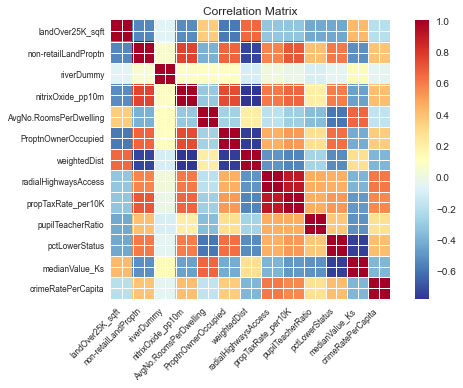

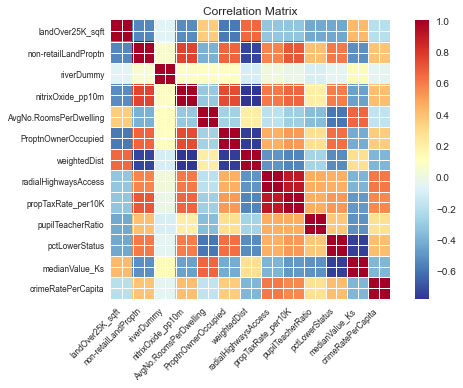

In [13]:
# Calculate and plot a correlation matrix for the train_data set
corrMatrix = train_data.corr(method='pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)

plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r')

In the preceding heatmap, we can see that there is a strong positive correlation between variables that have orange or red squares. There is a strong negative correlation between variables with blue squares. There is little or no correlation between variables with pale-colored squares.

# Graphical Investigation of Linear Relationships Using Python

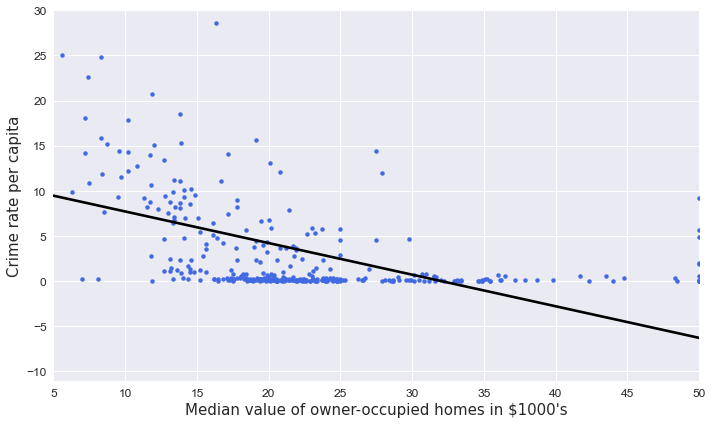

In [14]:
# Use the seaborn function regplot to create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='medianValue_Ks',
            y='crimeRatePerCapita',
            ci=None, # confidence interval
            data=train_data,
            ax=ax,
            color='k',
            scatter_kws={'s':20, 'color':'royalblue', 'alpha':1})
ax.set_ylabel('Crime rate per capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel('Median value of owner-occupied homes in $1000\'s', fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

# Examining a Possible Log-Linear Relationship Using Python

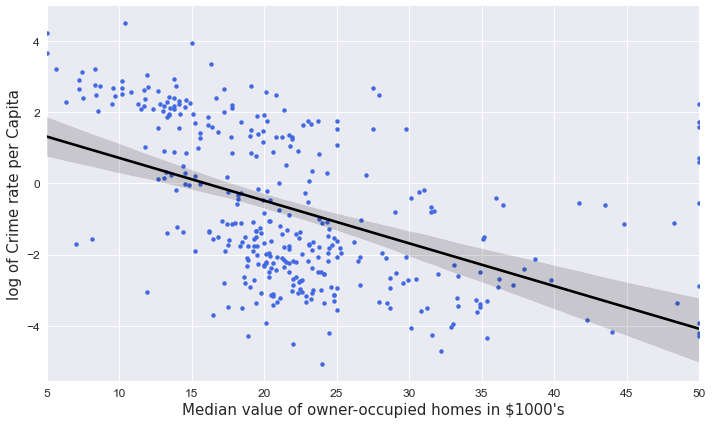

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks',
            y=y,
            ci=95,
            data=train_data,
            ax=ax,
            color='k',
            scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

# Fitting a Simple Linear Regression Model Using the Statsmodels Formula API

In [16]:
# import packages
import statsmodels.formula.api as smf

In [17]:
# define a linear regression model 
linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks', data=train_data)

As you can see, we call the ols function of the statsmodels API and set its formula argument by defining a patsy formula string that uses the tilde (~) symbol to relate the dependent variable to the independent variable. Tell the function where to find the variables named, in the string, by assigning the data argument of the ols function to the DataFrame that contains your variables (train_data).

In [18]:
# fit the model
linearModelResult = linearModel.fit()

In [19]:
# Print a summary of the model
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.56e-13
Time:                        09:46:41   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

# Fitting a Multiple Linear Regression Model Using the Statsmodels Formula API

In [20]:
# create a multi linear regression model
multiLinearRegression = smf.ols(formula = 'crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m',
                                data=train_data)

In [21]:
# fitting the model
multiLinearModResult = multiLinearRegression.fit()

In [22]:
# print the summary
print(multiLinearModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.19e-37
Time:                        09:46:41   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 